# Amelia's Single-cell experiment

### Q: Are the dpIELs that still exist in the absence of IEC MHCII phenotypically different than normal (dif. cytokines or other transcriptional profiles)?

## Load in libraries

In [1]:
import scanpy as sc

sc.logging.print_header()

scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.23.5 scipy==1.10.1 pandas==1.5.3 scikit-learn==1.2.1 statsmodels==0.13.5 python-igraph==0.10.4 pynndescent==0.5.8


## Read in the files

In [2]:
adata = sc.read_h5ad("write/adata_with_tcr_tnk.h5ad")
adata


AnnData object with n_obs × n_vars = 5546 × 2558
    obs: 'sample_id', 'sample_num', 'group', 'tissue', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ig', 'pct_counts_ig', 'leiden', 'filter_rna', 'has_contig', 'filter_contig_quality', 'filter_contig_VDJ', 'filter_contig_VJ', 'contig_QC_pass', 'filter_contig', 'clone_id', 'clone_id_by_size', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 'c_call_VDJ_main', 'c_call_VJ_main', 'v_call_abT_VDJ_main', 'd_call_ab

/Users/uqztuong/miniconda3/envs/dandelion/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/uqztuong/miniconda3/envs/dandelion/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/uqztuong/miniconda3/envs/dandelion/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/uqztuong/miniconda3/envs/dandelion/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


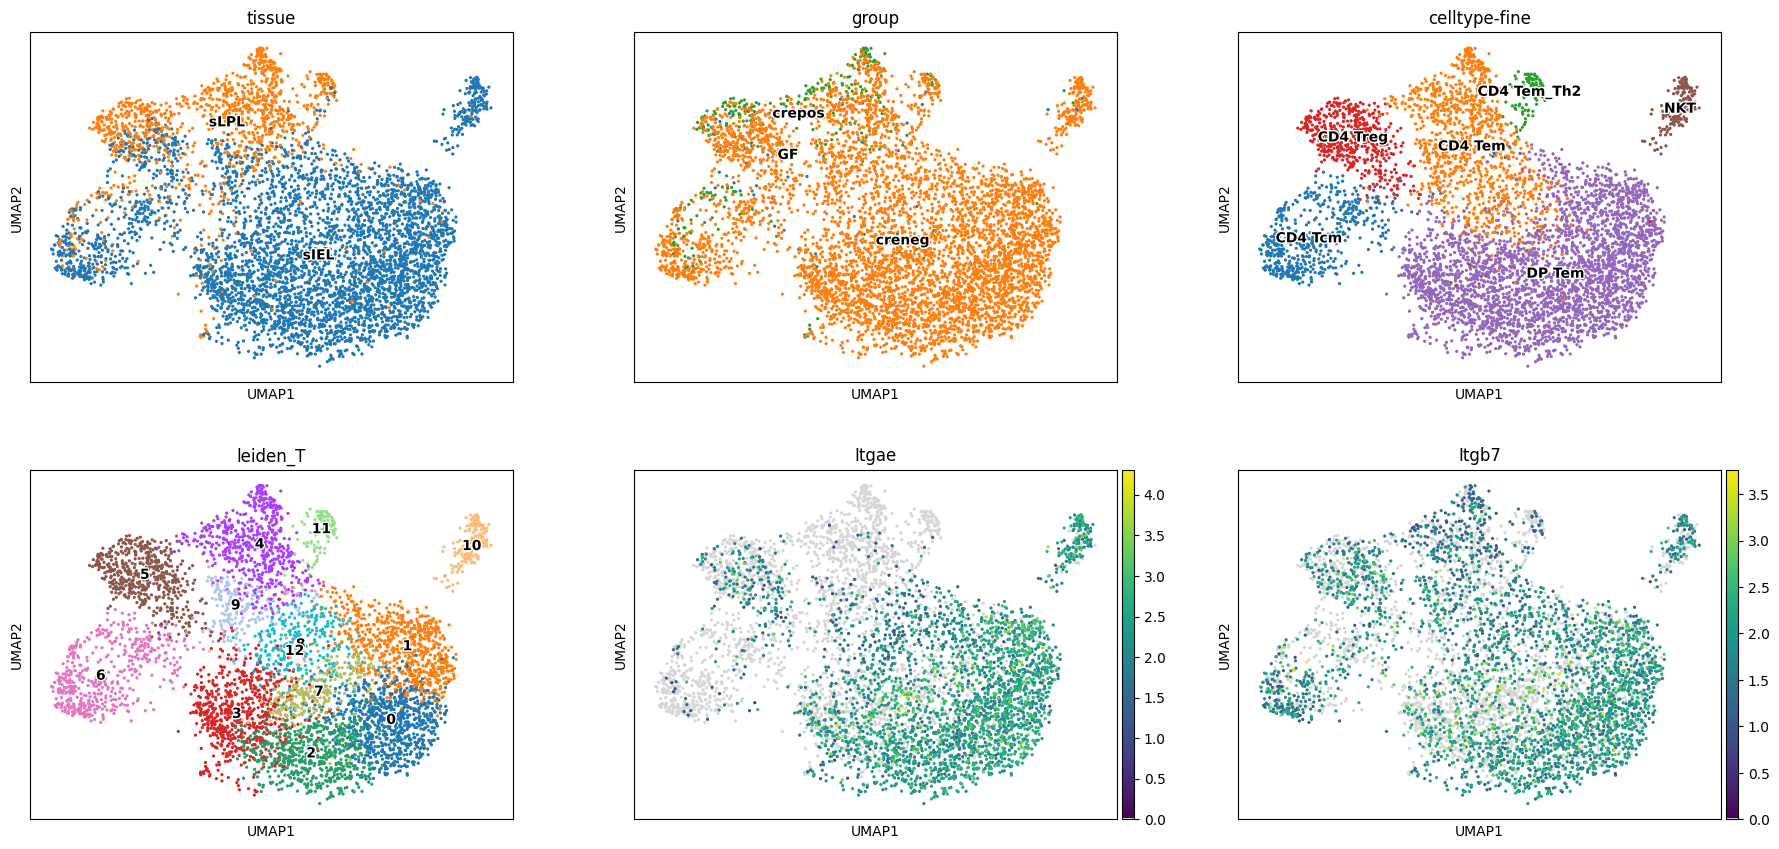

In [12]:
import tools

sc.pl.umap(
    adata,
    color=["tissue", "group", "celltype-fine", "leiden_T", "Itgae", "Itgb7"],
    color_map=tools.cmp(),
    ncols=3,
    legend_fontoutline=2,
    legend_loc="on data",
)


In [10]:
from tools import combine_two_categories

combine_two_categories(adata, "group", "leiden_T")
combine_two_categories(adata, "leiden_T", "group")


/Users/uqztuong/miniconda3/envs/dandelion/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


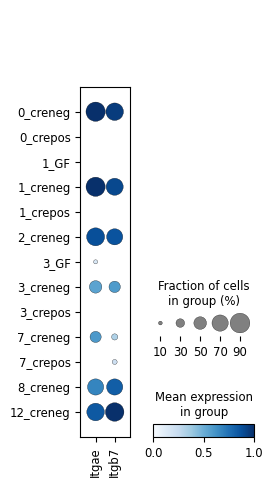

In [14]:
# add pseudotime trajectory to show that DP IELs are stuck in somewhere in the trajectory
sc.pl.dotplot(
    adata[adata.obs["leiden_T"].isin(["0", "1", "7", "2", "3", "8", "12"])],
    ["Itgae", "Itgb7"],
    color_map="Blues",
    groupby="leiden_T_group",
    standard_scale="var",
)


In [3]:
# create a new column that encompases the group, tissue and celltype-fine
from tools import combine_two_categories

combine_two_categories(adata, "tissue", "celltype-fine")
combine_two_categories(adata, "group", "celltype-fine")
combine_two_categories(adata, "group", "tissue_celltype-fine")


In [4]:
# subset to DP T cells
adata = adata[adata.obs["celltype-fine"] == "DP Tem"].copy()
adata


AnnData object with n_obs × n_vars = 3132 × 2558
    obs: 'sample_id', 'sample_num', 'group', 'tissue', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ig', 'pct_counts_ig', 'leiden', 'filter_rna', 'has_contig', 'filter_contig_quality', 'filter_contig_VDJ', 'filter_contig_VJ', 'contig_QC_pass', 'filter_contig', 'clone_id', 'clone_id_by_size', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 'c_call_VDJ_main', 'c_call_VJ_main', 'v_call_abT_VDJ_main', 'd_call_ab

/Users/uqztuong/miniconda3/envs/dandelion/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/uqztuong/miniconda3/envs/dandelion/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/uqztuong/miniconda3/envs/dandelion/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


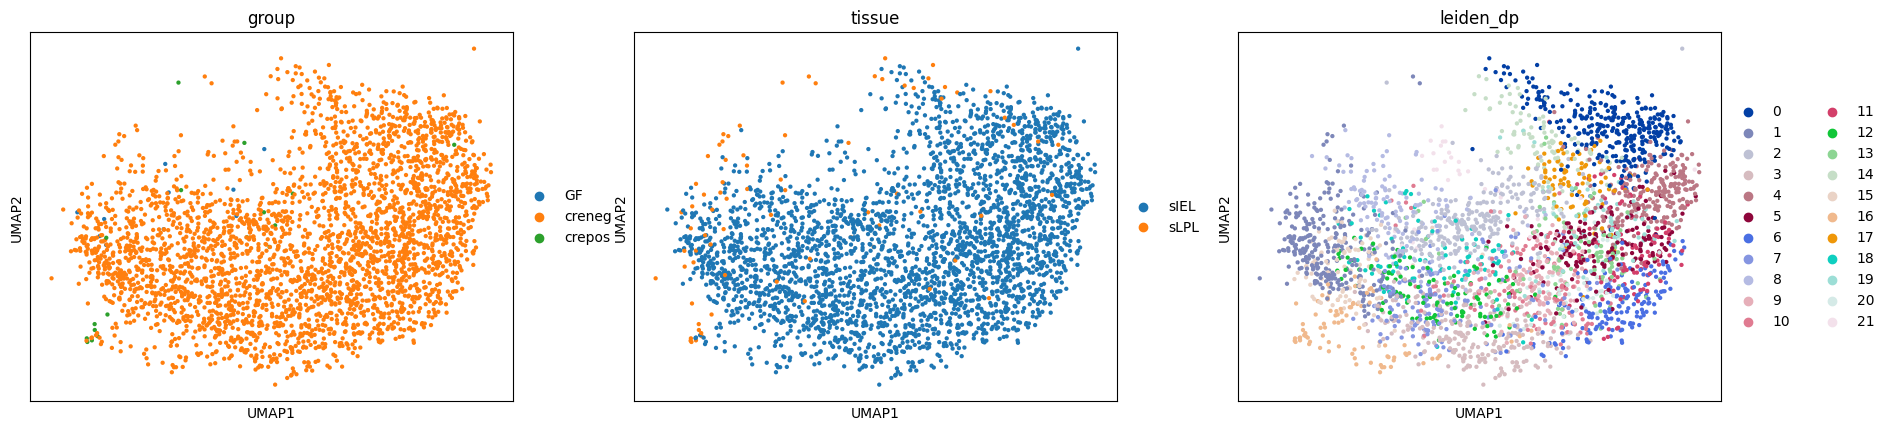

In [5]:
# let's also split to sub clusters so that we can see whether there could be sub-cluster differences
sc.tl.leiden(adata, key_added="leiden_dp", resolution=2)
sc.pl.umap(adata, color=["group", "tissue", "leiden_dp"])


/Users/uqztuong/miniconda3/envs/dandelion/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


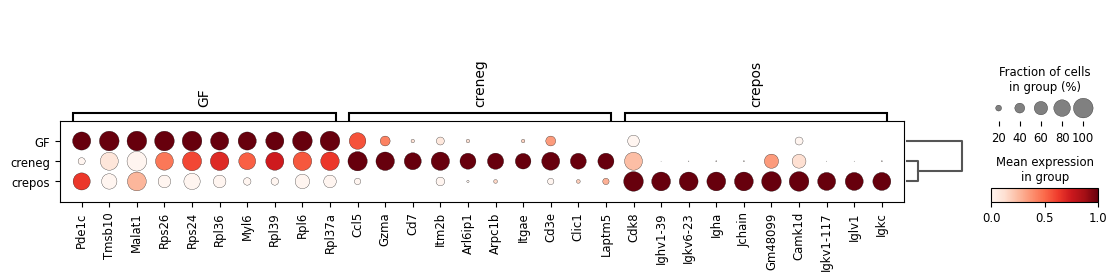

In [6]:
sc.tl.rank_genes_groups(adata, groupby="group", method="wilcoxon")
sc.pl.rank_genes_groups_dotplot(adata, min_logfoldchange=1, standard_scale="var")

In [12]:
from tools import exportDEres


In [16]:
### give this to virginia
exportDEres(adata, column="creneg", filename="creneg_DE.tsv")

/Users/uqztuong/Documents/GitHub/kttools/tools/sc/_sc.py:143: FutureWarning: Passing 'suffixes' which cause duplicate columns {'0_x'} in the result is deprecated and will raise a MergeError in a future version.
  lambda left, right: pd.merge(left, right, left_index=True, right_index=True),


In [17]:
exportDEres(adata, column="crepos", filename="crepos_DE.tsv")

/Users/uqztuong/Documents/GitHub/kttools/tools/sc/_sc.py:143: FutureWarning: Passing 'suffixes' which cause duplicate columns {'0_x'} in the result is deprecated and will raise a MergeError in a future version.
  lambda left, right: pd.merge(left, right, left_index=True, right_index=True),


In [7]:
import pandas as pd

df = pd.crosstab(
    adata.obs["leiden_dp"],
    adata.obs["group"],
)
df[df.crepos > 5]


group,GF,creneg,crepos
leiden_dp,,,
2,0,247,8
16,0,80,7


In [8]:
group1 = adata[
    (adata.obs["leiden_dp"] == "2") & (adata.obs["group"].isin(["crepos", "creneg"]))
]
group2 = adata[
    (adata.obs["leiden_dp"] == "16") & (adata.obs["group"].isin(["crepos", "creneg"]))
]


In [9]:
sc.tl.rank_genes_groups(group1, groupby="group", method="wilcoxon")
sc.tl.rank_genes_groups(group2, groupby="group", method="wilcoxon")

/Users/uqztuong/miniconda3/envs/dandelion/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:580: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/Users/uqztuong/miniconda3/envs/dandelion/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:580: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


/Users/uqztuong/miniconda3/envs/dandelion/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


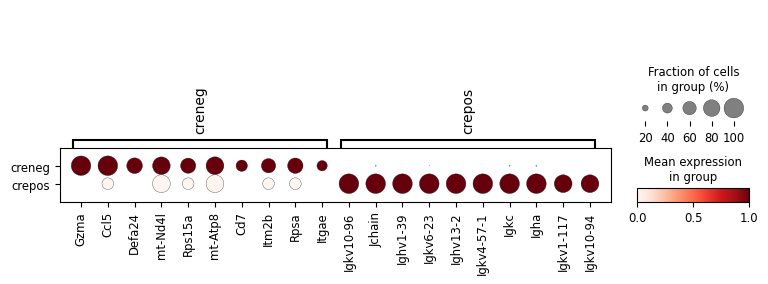

In [10]:
sc.pl.rank_genes_groups_dotplot(group1, min_logfoldchange=1, standard_scale="var")


/Users/uqztuong/miniconda3/envs/dandelion/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


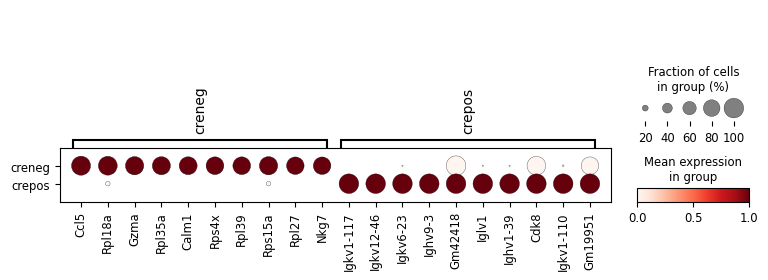

In [11]:
sc.pl.rank_genes_groups_dotplot(group2, min_logfoldchange=1, standard_scale="var")
